### Predicting heart disease using machine learning
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a 
machine learning model capable of predicting whether or not someone has heart disease on their medical attributes.

wek're going to take the following approach:
1. Problen definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The Original data came from the cleavland data from the UCI Machine Learning Repository.https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also a another verison of it availale on Kaggle. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/code

## 3. Evaluation

>  If we can reach 95% accuracy at predicting whether or not a patient has hert disease during the proof of concept, we'll pursue the project.

## 4. Features
> This where you'll get different inforamtion about each of the features in your data.
1. id (Unique id for each patient)
2.age (Age of the patient in years)
3.origin (place of study)
4.sex (Male/Female) 1 - male, 0 -female
5.cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
6.trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
7.chol (serum cholesterol in mg/dl)
8.fbs (if fasting blood sugar > 120 mg/dl)
9.restecg (resting electrocardiographic results)
11.-- Values: [normal, stt abnormality, lv hypertrophy]
12.thalach: maximum heart rate achieved
13.exang: exercise-induced angina (True/ False)
14.oldpeak: ST depression induced by exercise relative to rest
15.slope: the slope of the peak exercise ST segment
    * 0: Upsloping:better with exercise
    * 1: Flatsloing: miniml cahnge (typical healthy heart)
    * 2: Downslopins:signs of unhealty heart
16.ca: number of major vessels (0-3) colored by fluoroscopy
17.thal: [normal; fixed defect; reversible defect]
18.**num**: the predicted attribute

## Preparing the tools

we're going to use pandas, Matplotlib abd Numpy for data analysys and manipulation

In [3]:
# Import all the important tools we need
# Regular EDA (exploratory data analysis)and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want out plots to appear inside the notebook
%matplotlib inline 
# Models form Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [4]:
## Load data

In [5]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/heart-disease.csv')

Mounted at /content/drive


In [6]:
df.shape

(303, 14)

## Data Exploration (EDA) = > Exploratory data analysis 

the goal here is to find out more about the data and become a subject matter exxport on the dataset you're working with

1. What questions(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. what's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, chage or remove features to get more out of your data?

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
df.target

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [10]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

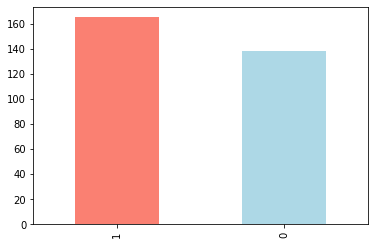

In [11]:
df["target"].value_counts().plot(kind = "bar",color = ["salmon","lightblue"]);

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
### Heart Disease Frequency accrording to sex
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [16]:
# Compare target column with sex column
pd.crosstab(df.target,df.sex,margins=True)

# so basically out of 96 female 24 have them dont have heart disease and 72 of them have heart disease

sex,0,1,All
target,,,
0,24,114,138
1,72,93,165
All,96,207,303


In [129]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

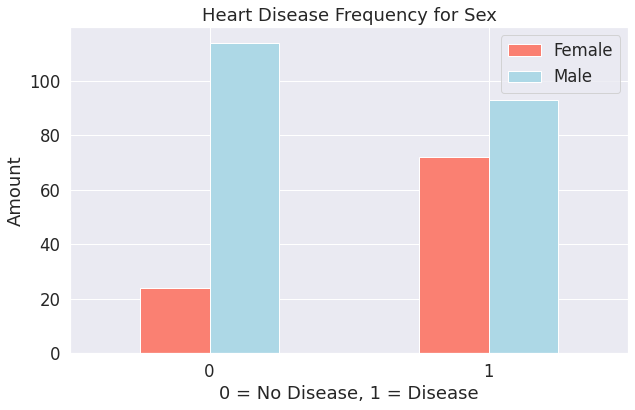

In [127]:
'''
it could be used to explore the relationship between sex and heart disease and could potentially be used
as part of the feature engineering process when preparing the data for a machine learning model.
'''
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"]);
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

## Age vs Max Heart Disease

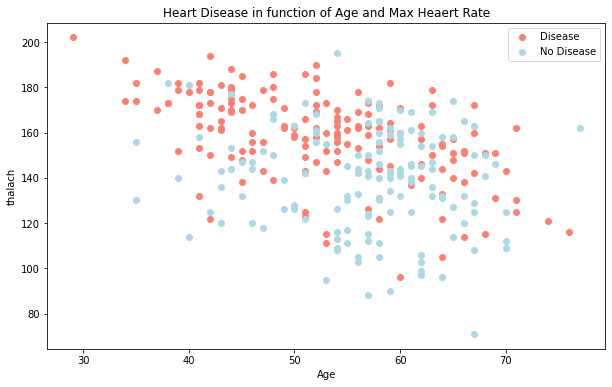

In [20]:
# create another fig
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon");

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue");

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heaert Rate")
plt.xlabel("Age")
plt.ylabel("thalach")
plt.legend(["Disease","No Disease"])

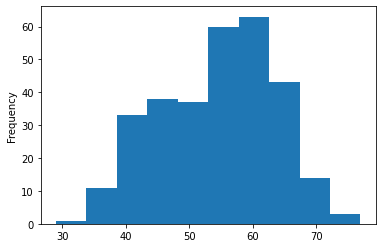

In [21]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

## Heart Disease Frequency per Chest Pain Type
  cp - chest pain type
  <br>
  0. Typical angina: chest pain related decrease blood supply to the heart
  1. Atypical angia: chest pain not releated to heart
  2. Non-anginal pain: typucically esophageal spasms (no heart releated)
  3. Asymptomatic: chest pain not shoing signs of disease

In [22]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [23]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


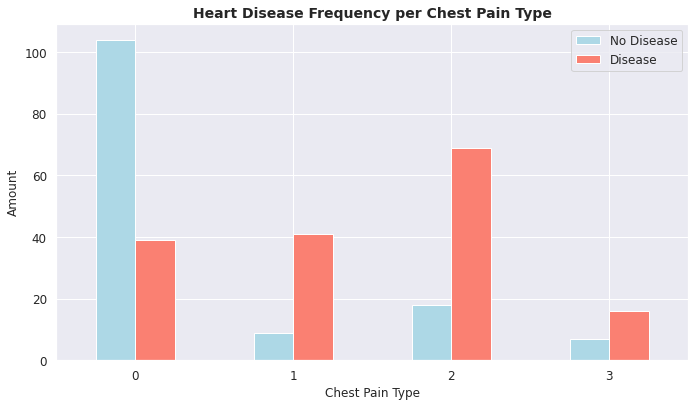

In [124]:
# create a new variable with a different name for the legend labels
legend_labels = ['No Disease', 'Disease']

# plot the chart
pd.crosstab(df.cp,df.target).plot(kind='bar', figsize=(10,6), color=['lightblue', 'salmon'])

# add chart title, labels, and legend
plt.title('Heart Disease Frequency per Chest Pain Type', fontsize=14, fontweight='bold')
plt.xlabel('Chest Pain Type', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(legend_labels, fontsize=12)
plt.tight_layout()

# show the chart
plt.show()

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


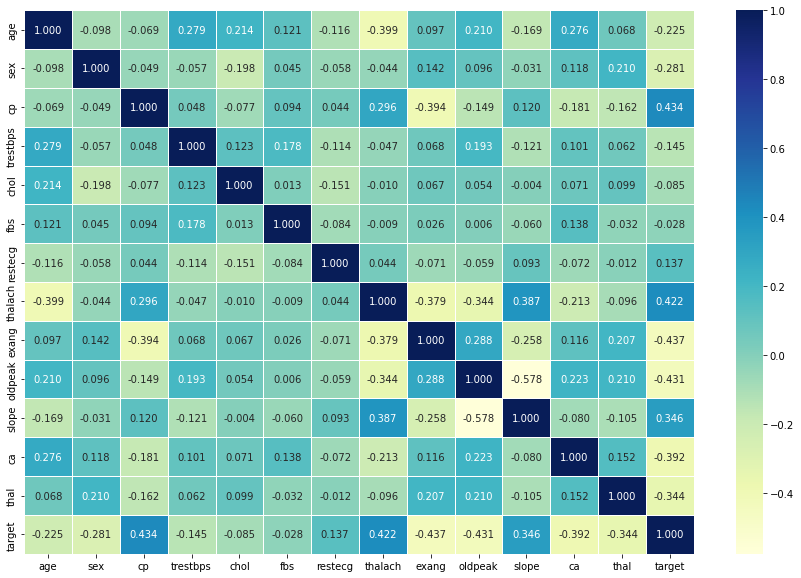

In [27]:
# Let's make out correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = "2.3f",
                 cmap = "YlGnBu");

## 5. Modellig

In [28]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
# split data into X and y
X = df.drop("target",axis =1)
y = df.target

In [30]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [31]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [32]:
# setting seed value
np.random.seed(42)

# Split data into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size = 0.2)

In [33]:
X_train


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [34]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64, 242)

Now we'got out data split into training and test set's , it's time to build machine learning models

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test sets

we're going to try 3 different machine learning model's 
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [35]:
# put models in a dictionary
models =  {
    "Logistic Regression":LogisticRegression(),
    "K-Nearest Neighbours":KNeighborsClassifier(),
    "RandomForest":RandomForestClassifier()
}
def fit_and_score(models, X_train,X_test,y_train,y_test):
  """
  Fits and evaluates given machine learning models.
  models: a dict of different Scikit-Learn machine learning models
  X_train: training data (no labels)
  y_test: testing data (no labels)
  y_train: training labels
  y_test: test labels
  """
  # Set random seed
  np.random.seed(42)
  model_scores = {}
      # Loop thorug models
  for name, model in models.items():
    # fit the model to the data
    model.fit(X_train,y_train)
    # Evaluate the model and append it's score to the model_scores
    model_scores[name] = model.score(X_test,y_test)
  return model_scores



In [36]:
model_scores = fit_and_score(models = models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'K-Nearest Neighbours': 0.6885245901639344,
 'RandomForest': 0.8360655737704918}

# Model Comparison

Text(0, 0.5, 'Accuracy')

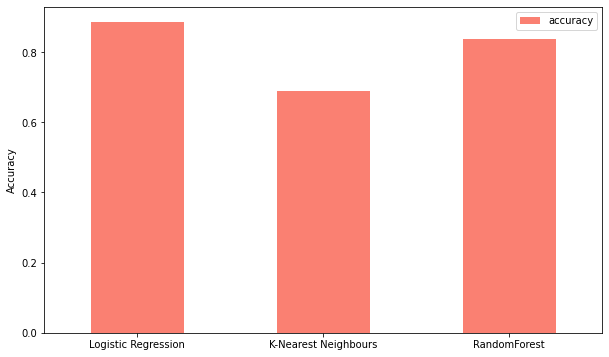

In [37]:
Model_comparison = pd.DataFrame(model_scores,index = ["accuracy"])
Model_comparison.T.plot.bar(figsize =(10,6),color=["salmon"])
plt.xticks(rotation = 0);
plt.ylabel("Accuracy")

Now we've got a baseline model .... and we know a model first predictions aren't always that we should based out next steps off. What should do?

Let'a look at the following:
* Hyperparameter tuing.
* Feature importance
* Confusion matrix
* Cross-validiate
* Precision
* Recall
* Classification Report
* ROC Curve
* Area Under the Curve (AUC)


### Hyperparameter tuning

In [38]:
from seaborn.regression import algo
from sklearn import neighbors
# Let's tune KNN

train_scores = []
test_score = []

# Create a list of different values for n_neighbours
neighbors = range(1,21)

# setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n-neighbours
for i in neighbors:
  knn.set_params(n_neighbors = i)

  # Fit the algorithm
  knn.fit (X_train, y_train)

  # Update the training scores list
  train_scores.append(knn.score(X_train,y_train))

  # Update the test score list
  test_score.append(knn.score(X_test,y_test))

In [39]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [40]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maimum KNN score on the test data: 75.41


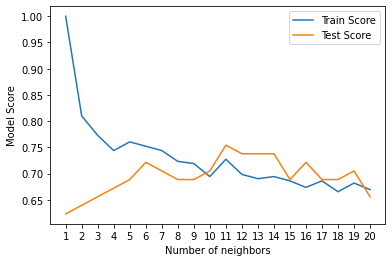

In [41]:
plt.plot(neighbors, train_scores,label = "Train Score")
plt.plot(neighbors, test_score,label = "Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()
print(f"Maimum KNN score on the test data: {max(test_score)*100:.2f}")

## Hyperparameter tuning with RandomizedSearchCV

we're going to tune:
* LogisticRegression()
* RandomForestClassifier()<br>
.... using RandomizedSearchCV

In [42]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver":["liblinear"]}
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)
           }

In [43]:
# Tune Logistic Regression
np.random.seed(42)
# setup random hyperparameter search for LogisticRegression
rs_log_reg = LogisticRegression()
logistic_reg = RandomizedSearchCV(estimator=rs_log_reg,
                                 param_distributions = log_reg_grid,
                                  n_iter = 20,
                                  cv = 5,
                                  verbose = True,
                                  refit =True
                                  )
# Fit random hyperparameter search model for LogisticRegression
logistic_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [44]:
logistic_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [45]:
logistic_reg.score(X_test,y_test)

0.8852459016393442

In [46]:
# Tune Logistic Regression
np.random.seed(42)
# setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                 param_distributions = rf_grid,
                                  n_iter = 20,
                                  cv = 5,
                                  verbose = True
                                  )
# Fit random hyperparameter search model for LogisticRegression
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [47]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [48]:
# Evaluate the randomized search RandomForestClassifier  model
rs_rf.score(X_test,y_test)

0.8688524590163934

In [49]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'K-Nearest Neighbours': 0.6885245901639344,
 'RandomForest': 0.8360655737704918}

In [50]:
# 1. by hand
# 2. RandomizedSearchCV
# 3. GridSearchCV

### Hyperparameter Tuning with GridSearchCV
Since our LogisticRegression model provides the best scores so far, we'll try and improve them 
again using GridSearchCV

In [51]:
# Different Hyperparameters for our logisticRegression model
# We can serach for different Hyperparameter like search:
# "How to tune Hyperparameter of logisticRegression model in python"

log_reg_grid = {"C":np.logspace(-4,4,30),
                "solver":["liblinear"]}

# setup grid hyperparameter in search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                           param_grid = log_reg_grid,
                           cv = 5,
                           verbose = True,
                           refit=True)
 # Fit grid hyperparameter search model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [52]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [53]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [54]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'K-Nearest Neighbours': 0.6885245901639344,
 'RandomForest': 0.8360655737704918}

In [55]:
"""
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
 
    Plots a confusion matrix using Seaborn's heatmap().

    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)
"""

'\n# Import Seaborn\nimport seaborn as sns\nsns.set(font_scale=1.5) # Increase font size\n \ndef plot_conf_mat(y_test, y_preds):\n \n    Plots a confusion matrix using Seaborn\'s heatmap().\n\n    fig, ax = plt.subplots(figsize=(3, 3))\n    ax = sns.heatmap(confusion_matrix(y_test, y_preds),\n                     annot=True, # Annotate the boxes\n                     cbar=False)\n    plt.xlabel("Predicted label") # predictions go on the x-axis\n    plt.ylabel("True label") # true labels go on the y-axis \n    \nplot_conf_mat(y_test, y_preds)\n'

## Evaluting our tuned machine learning classifier, beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification reporty
* Precision
* Recall

.... and it would ee great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make preditions.

In [56]:
# Make prediction with tuned model
y_preds = gs_log_reg.predict(X_test)

In [57]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [58]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

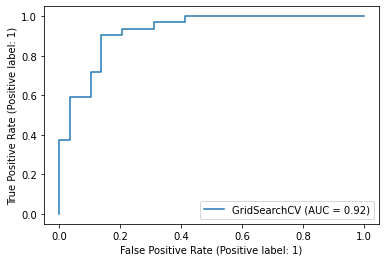

In [59]:
# Plot ROC curve and calculate AUC metric
# Where AUC is is below the plot
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

In [60]:
# confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


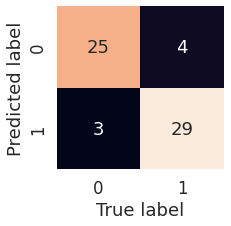

In [61]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test,y_preds):
  """
  Plot a nice looking confusion matrix using Seaborn's heatmap()
  """
  fig, ax = plt.subplots(figsize=(3,3))
  ax = sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
  plt.xlabel("True label")
  plt.ylabel("Predicted label")
plot_conf_mat(y_test,y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix,
let's get a classififcaation report as well as cross-validated precison, recall and f1-score

In [62]:
# the support is the number of sample created where 0 is 29 and 1 is 32
# macro avg is the make tell weather model has class inbalances
# weighted means each metric is calculated with repect to how many samples there are in each class.
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics wing cross=validiation

we're going to calculate accuaray, precisoin, recall and f1-score of out model
using cross-validation and to do so we'll be using 'cross_val_score()

In [63]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [65]:
# Crate a new classififer with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver= 'liblinear')

In [72]:
# Cross-validated accuracy
cv_accuracy = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_accuracy.mean()

0.8446994535519124

In [74]:
# Cross-validated precision
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision.mean()

0.8207936507936507

In [75]:
# Cross-validated recall
cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall.mean()

0.9212121212121213

In [90]:
# Cross-validated f1-score
cv_f1_score = cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1_score.mean()

0.8673007976269721

In [94]:
# Visualized cross-validated matrics
cv_metrics = pd.DataFrame({
    "Accuracy":cv_accuracy,
    "Precision":cv_precision,
    "Recall":cv_recall,
    "F1-score":cv_f1_score})
cv_metrics

,Accuracy,Precision,Recall,F1-score
0,0.819672,0.775000,0.939394,0.849315
1,0.901639,0.885714,0.939394,0.911765
2,0.868852,0.857143,0.909091,0.882353
3,0.883333,0.861111,0.939394,0.898551
4,0.750000,0.725000,0.878788,0.794521


<AxesSubplot:title={'center':'Cross-validated classification'}>

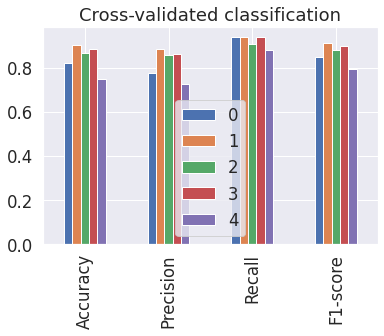

In [98]:
cv_metrics.T.plot.bar(title="Cross-validated classification")

### Features Importance

Feature importance is another as asking,
"which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature immportance is to search for *(MODEL NAME) feaure importance".

Let's find the feature importance for our LogisticRegression model....

Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

There are many types and sources of feature importance scores, although popular examples include statistical correlation scores, coefficients calculated as part of linear models, decision trees, and permutation importance scores.

OR

HOw much each input variable or input features is are contributing the target variable

In [102]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [103]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [104]:
clf = LogisticRegression(C=0.20433597178569418,solver = "liblinear")
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [122]:
# check coef_
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [112]:
 # Match coef's of features to columns
 features_dict = dict(zip(df.columns,list(clf.coef_[0])))
 features_dict

{'age': 0.0032076883508599633,
 'sex': -0.8606204883695241,
 'cp': 0.660014324982524,
 'trestbps': -0.01155970600550047,
 'chol': -0.0016649614843449207,
 'fbs': 0.040172360271308105,
 'restecg': 0.31603405294617176,
 'thalach': 0.02458922341328129,
 'exang': -0.604701713592625,
 'oldpeak': -0.5679545646616215,
 'slope': 0.4508539209693025,
 'ca': -0.6373332766360461,
 'thal': -0.6755509369619848}

<AxesSubplot:title={'center':'Feature importan'}>

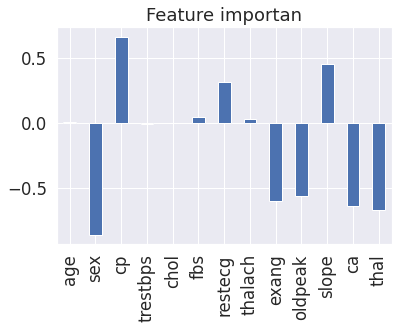

In [115]:
# visualize feature importance
feature_df = pd.DataFrame(features_dict,index=[0])
feature_df.T.plot.bar(title="Feature importan",legend=False)

In [117]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [118]:
pd.crosstab(df.slope,df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


<AxesSubplot:xlabel='slope'>

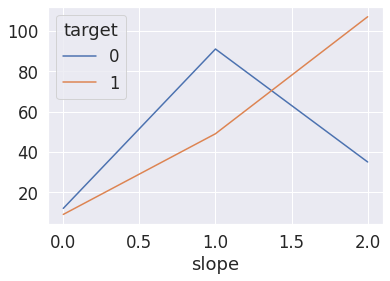

In [120]:
pd.crosstab(df.slope,df.target).plot()

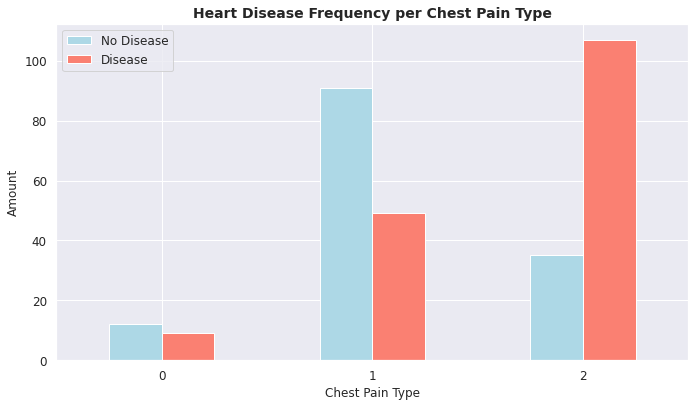

In [121]:
# create a new variable with a different name for the legend labels
legend_labels = ['No Disease', 'Disease']

# plot the chart
pd.crosstab(df.slope,df.target).plot(kind='bar', figsize=(10,6), color=['lightblue', 'salmon'])

# add chart title, labels, and legend
plt.title('Heart Disease Frequency per Chest Pain Type', fontsize=14, fontweight='bold')
plt.xlabel('Chest Pain Type', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(legend_labels, fontsize=12)
plt.tight_layout()

# show the chart
plt.show()

* 0: Upsloping:better with exercise
* 1: Flatsloing: miniml cahnge (typical healthy heart)
* 2: Downslopins:signs of unhealty heart

6. Experimentation

if you haven't hit your sevaluation metric yet ... ask yoursef...

* could you collect more data?
* could you try a better model? like catBoost or XGBoost?
* could you improve the current models? (beyound what we've done so far)

* If your model is good enough (you have hit your evalutaion metric how would your  it and share it with others?

In [133]:
from joblib import dump, load
dump(clf, 'heaert-disease-classification.joblib')

['heaert-disease-classification.joblib']